<a href="https://colab.research.google.com/github/Anchaliya75/Convolve/blob/main/Convolve_PS2_Oversampling_LDA_formating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.linear_model import LogisticRegression,RidgeClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from time import process_time 

## Loading the data and getting basic idea 

In [ ]:
df = pd.read_excel('/content/FileAndResults_Problem2.xlsx')
df.head()

,File Changed,Component,Coder,Tester,Category,Sanity name,nets Tested,Sanity Result
0,cpp/csyu/category/fnf,asr1001-flowpsk,Batukbaj,samsk,PD-asr1001,Thor_Vista,NCS5500,Pass
1,ignor-dp/build,asr1001-ignor,Alex,manishakang,Tools,vistra-cxr,NCS5500,Aborted
2,ignor-dp/cdp,asr1001-ignor,Alex,manishakang,PD-asr1001,vistra-cxr,NCS5500,Fail
3,ignor-dp/csco/affinity,asr1001-ignor,Alex,manishakang,PD-asr1001,vistra-cxr,NCS5500,Aborted
4,ignor-dp/csco/cdp,asr1001-ignor,Alex,manishakang,PD-asr1001,vistra-cxr,NCS5500,Aborted


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   File Changed   351 non-null    object
 1   Component      351 non-null    object
 2   Coder          351 non-null    object
 3   Tester         337 non-null    object
 4   Category       351 non-null    object
 5   Sanity name    351 non-null    object
 6   nets Tested    351 non-null    object
 7   Sanity Result  351 non-null    object
dtypes: object(8)
memory usage: 22.1+ KB


In [ ]:
df.describe().transpose()

,count,unique,top,freq
File Changed,351,176,cpp/csyu/category/fnf,2
Component,351,45,asr1001-forge-cgn,70
Coder,351,7,patrick,130
Tester,337,18,manishakang,109
Category,351,11,PD-asr1001,146
Sanity name,351,25,vistra-cxr,122
nets Tested,351,14,"asr1001-PX,asr1001-X64",105
Sanity Result,351,3,Pass,210


## One Hot encoding

In [ ]:
#One hot encoding of Coder ,Tester ,Component Category ,Sanity Name,nets Tested 
new_df = pd.get_dummies(df,columns=['Coder','Tester','Component','Category','Sanity name','nets Tested'])

In [ ]:
# Dropping "File Changed"
new_df.drop(columns='File Changed',inplace =True)

In [ ]:
new_df.head()

,Sanity Result,Coder_Alex,Coder_Batukbaj,Coder_abhimanyu,Coder_actalivineo,Coder_chris,Coder_daffoil,Coder_patrick,Tester_akafsg,Tester_arvenugo,...,"nets Tested_NCS560,SPITFIRE,NCS540L","nets Tested_NCS5K,NCS560",nets Tested_NCS6K,"nets Tested_SPITFIRE,NCS4K","nets Tested_SPITFIRE,NCS540L",nets Tested_XRV9K,"nets Tested_asr1001-PX,asr1001-X64",nets Tested_asr1001-X64,"nets Tested_asr1001-X64,asr1001-PX",nets Tested_saraja-PX
0,Pass,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aborted,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fail,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aborted,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aborted,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Taking Label(sanity result) from dataframe
Label = new_df.loc[:,['Sanity Result']]

In [ ]:
Label.head()

,Sanity Result
0,Pass
1,Aborted
2,Fail
3,Aborted
4,Aborted


## Class distribution

Before we begin with anything else, let's check the class distribution. There are 3 classes Pass, Fail and Aborted.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


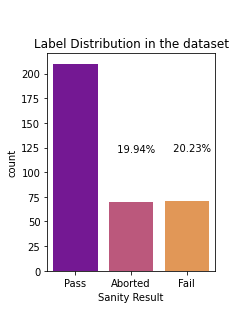

In [ ]:
plt.figure(figsize=(3,4))
plt.title("Label Distribution in the dataset")
p1 = sns.countplot(Label['Sanity Result'], palette = 'plasma')

for p in p1.patches:
        p1.annotate('{:6.2f}%'.format(p.get_height()/len(Label['Sanity Result'])*100), (p.get_x()+0.1, p.get_height()+50))
        
plt.show()

ohh, as expected! There is a class distribution. There are more Sanity Results with Pass than Aborted and Fail.

In [ ]:
# Encoding/Replacing Label with numerical value 
Label.replace('Pass', 2, inplace = True)
Label.replace('Aborted', 1,  inplace = True) 
Label.replace('Fail', 0,  inplace = True)

In [ ]:
Label.head()

,Sanity Result
0,2
1,1
2,0
3,1
4,1


In [ ]:
X= new_df.drop(columns = ['Sanity Result'])
y = Label

In [ ]:
#Applying Linear Discriminant Analysis and reducing the dimensions into two components
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_t=lda.transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#new_DataFrame with 2 columns 
X_t =pd.DataFrame(X_t,columns=['A','B'])

In [ ]:
#Applying oversampling using RandomOverSampler so that all classes have same no of samples
ros =  RandomOverSampler(random_state=52)
X_ros, y_ros = ros.fit_resample(X_t, y)

In [ ]:
y_ros['Sanity Result'].unique()

array([2, 1, 0])

In [ ]:
y_ros[y_ros['Sanity Result']==2]

,Sanity Result
0,2
8,2
9,2
10,2
11,2
...,...
338,2
342,2
343,2
346,2


In [ ]:
y_ros[y_ros['Sanity Result']==1]

,Sanity Result
1,1
3,1
4,1
5,1
6,1
...,...
625,1
626,1
627,1
628,1


In [ ]:
y_ros[y_ros['Sanity Result']==0]

,Sanity Result
2,0
7,0
20,0
29,0
32,0
...,...
485,0
486,0
487,0
488,0


Each Class Now have 210 samples

##Applied Stratified Shuffle Split to split data in train and **test**

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0)

for train,test in sss.split(X_ros,y_ros):    
    X_train_SS = X_ros.iloc[train]
    y_train_SS = y_ros.iloc[train]
    X_test_SS = X_ros.iloc[test]
    y_test_SS = y_ros.iloc[test]

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Classifier Pipeline

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state = 0),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(class_weight='balanced'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    'RidgeClassifier': RidgeClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'Perceptron': Perceptron(class_weight='balanced'),
    'xgboost': XGBClassifier(n_estimators=300),
    'catboost': CatBoostClassifier(verbose=0)
        }

In [ ]:
no_classifiers = len(classifiers.keys())

def batch_classify(X_train_tranformed, y_train, X_test_tranformed, y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['Classifier', 'f1', 'Training time'])
    count = 0
    for key, classifier in classifiers.items():
        t_start = process_time()  
        classifier.fit(X_train_tranformed, y_train)
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        y_predicted = classifier.predict(X_test_tranformed)
        
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'f1'] = f1_score(y_test, y_predicted, average = 'macro')
        df_results.loc[count,'Training time'] = t_elapsed
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_elapsed))
        count+=1

    return df_results

#Predicting F1 score of all classifier Pipelines

In [ ]:
df_results = batch_classify(X_train_SS, y_train_SS,X_test_SS, y_test_SS)
print(df_results.sort_values(by='f1', ascending=False))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

trained Logistic Regression in 0.01 s
trained Decision Tree in 0.00 s
trained k-Nearest Neighbors in 0.00 s
trained Linear SVM in 0.00 s
trained Gradient Boosting Classifier in 0.19 s
trained Random Forest in 0.10 s
trained RidgeClassifier in 0.01 s


<ipython-input-375-537b99df1901>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_tranformed, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


trained AdaBoost in 0.11 s
trained Perceptron in 0.00 s
trained xgboost in 0.08 s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


trained catboost in 1.03 s
                      Classifier        f1  Training time
3                     Linear SVM  0.853804       0.004934
9                        xgboost  0.845853       0.078832
1                  Decision Tree  0.845024       0.003612
5                  Random Forest  0.845024       0.103862
0            Logistic Regression  0.841855       0.010342
10                      catboost  0.840762       1.029730
4   Gradient Boosting Classifier  0.840473       0.187286
7                       AdaBoost  0.835836       0.105474
6                RidgeClassifier  0.829118       0.006048
8                     Perceptron  0.824652       0.003561
2            k-Nearest Neighbors  0.813597       0.002587
